In [3]:
%matplotlib inline


import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


<Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

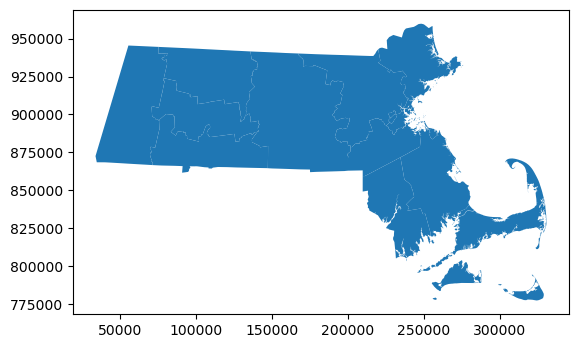

In [4]:
maoutline= gpd.read_file('/Users/cecilywang/Downloads/counties/COUNTIES_POLY.shp')
maoutline.plot()
maoutline.crs

# o	
- Will a different set of predictors (feature engineering) give us better predictions of land values in Massachusetts? (Lab 3)
-	Cross-validation
o	Which modeling strategy most accurately predicts land values in a larger region it hasn’t seen yet (i.e., spatial cross-validation instead of random cross-validation)? (Lab 3

- which set of predictors will give us better predictions of Temperature change in the US? And what if our modeling strategy uses spatial cross-validation instead of random cross-validation?))


In [5]:
#working folder
def wf(x):
    return '/Users/cecilywang/Downloads/Shapefile/EE508 project/mun/' + x
#biomodelos folder
def bf(x):
    return '/Users/cecilywang/Downloads/EE508/Final_project/data' + x

In [6]:
#importing pc_MA_EE508.shp as a geodataframe to shp and setting index = 'pid'
shp = gpd.read_file('/Users/cecilywang/Downloads/Shapefile/crv-us-climate-risk-proj-county-2040-2049.shp')

shp


GEOID   TempChg   PrepChg  PrepExt  ColdExt  HeatExt    DryChg  \
0     31039  1.886557 -1.198662     42.3     60.6     38.4 -0.352077   
1     53069  1.527373  3.152251    199.6    121.6     46.6 -0.257483   
2     35011  1.912049  0.210620     67.9     68.4     50.4 -0.137472   
3     31109  1.833498  0.540165    115.4     59.2     34.4 -0.238759   
4     31129  1.650914  0.990732    183.6     59.5     30.8 -0.181289   
...     ...       ...       ...      ...      ...      ...       ...   
3103  13123  1.662172  1.486984    131.1     31.7     47.4  0.019642   
3104  27135  1.966627 -1.267133     18.0     54.6     34.3 -0.319868   
3105  28089  1.554215  0.420355     99.5     36.9     55.9 -0.102937   
3106  48227  1.853069  0.359075     87.1     48.1     48.4 -0.136675   
3107  54099  2.001485 -0.035129     85.0     55.2     40.8 -0.137949   

      ImpSurface    HouseDen         PopEst  HouseSLR   RoadSLR  Hazard(H)  \
0       0.762064   75.326079    5194.000000  0.000000  0.000000   0.223508   
1       0.704089   52.767067    3731.666667  0.001953  0.000032   0.541184   
2       0.046973   38.191961    2159.333333  0.000000  0.000000   0.335316   
3       4.286244  746.153727  404251.333300  0.000000  0.000000   0.281753   
4       0.475792   52.644200    4697.666667  0.000000  0.000000   0.297213   
...          ...         ...            ...       ...       ...        ...   
3103    2.863802  407.712485   65869.333330  0.000000  0.000000   0.261650   
3104    0.475485   49.230158   15101.333330  0.000000  0.000000   0.195794   
3105    2.336470  291.392220  162476.333300  0.000000  0.000000   0.244329   
3106    0.647368   94.605611   24947.666670  0.000000  0.000000   0.281713   
3107    1.677603  200.571835   16511.333330  0.000000  0.000000   0.278991   

      Expos(E)  Vulner(V)  Risk=HEV   HEV*100  \
0     0.005301   0.296029  0.000351  0.035076   
1     0.005710   0.287844  0.000889  0.088948   
2     0.000178   0.287650  0.000017  0.001720   
3     0.043427   0.325646  0.003984  0.398449   
4     0.003258   0.286739  0.000278  0.027770   
...        ...        ...       ...       ...   
3103  0.022381   0.306330  0.001794  0.179390   
3104  0.003575   0.290377  0.000203  0.020324   
3105  0.021526   0.279996  0.001473  0.147260   
3106  0.005157   0.273766  0.000398  0.039775   
3107  0.012234   0.288323  0.000984  0.098411   

                                               geometry  
0     POLYGON ((-97.01952 42.00410, -97.01952 42.004...  
1     POLYGON ((-123.43639 46.23820, -123.44759 46.2...  
2     POLYGON ((-104.56739 33.99757, -104.56772 33.9...  
3     POLYGON ((-96.91075 40.78494, -96.91075 40.790...  
4     POLYGON ((-98.27367 40.08940, -98.27367 40.089...  
...                                                 ...  
3103  POLYGON ((-84.65478 34.66559, -84.65488 34.669...  
3104  POLYGON ((-96.40466 48.80528, -96.40467 48.813...  
3105  POLYGON ((-90.09363 32.70763, -90.09360 32.707...  
3106  POLYGON ((-101.69227 32.27106, -101.69221 32.2...  
3107  POLYGON ((-82.59529 38.36978, -82.59515 38.369...  

[3108 rows x 18 columns]

In [7]:
shp = shp.rename(columns={'GEOID': 'fips'})
shp

fips   TempChg   PrepChg  PrepExt  ColdExt  HeatExt    DryChg  \
0     31039  1.886557 -1.198662     42.3     60.6     38.4 -0.352077   
1     53069  1.527373  3.152251    199.6    121.6     46.6 -0.257483   
2     35011  1.912049  0.210620     67.9     68.4     50.4 -0.137472   
3     31109  1.833498  0.540165    115.4     59.2     34.4 -0.238759   
4     31129  1.650914  0.990732    183.6     59.5     30.8 -0.181289   
...     ...       ...       ...      ...      ...      ...       ...   
3103  13123  1.662172  1.486984    131.1     31.7     47.4  0.019642   
3104  27135  1.966627 -1.267133     18.0     54.6     34.3 -0.319868   
3105  28089  1.554215  0.420355     99.5     36.9     55.9 -0.102937   
3106  48227  1.853069  0.359075     87.1     48.1     48.4 -0.136675   
3107  54099  2.001485 -0.035129     85.0     55.2     40.8 -0.137949   

      ImpSurface    HouseDen         PopEst  HouseSLR   RoadSLR  Hazard(H)  \
0       0.762064   75.326079    5194.000000  0.000000  0.000000   0.223508   
1       0.704089   52.767067    3731.666667  0.001953  0.000032   0.541184   
2       0.046973   38.191961    2159.333333  0.000000  0.000000   0.335316   
3       4.286244  746.153727  404251.333300  0.000000  0.000000   0.281753   
4       0.475792   52.644200    4697.666667  0.000000  0.000000   0.297213   
...          ...         ...            ...       ...       ...        ...   
3103    2.863802  407.712485   65869.333330  0.000000  0.000000   0.261650   
3104    0.475485   49.230158   15101.333330  0.000000  0.000000   0.195794   
3105    2.336470  291.392220  162476.333300  0.000000  0.000000   0.244329   
3106    0.647368   94.605611   24947.666670  0.000000  0.000000   0.281713   
3107    1.677603  200.571835   16511.333330  0.000000  0.000000   0.278991   

      Expos(E)  Vulner(V)  Risk=HEV   HEV*100  \
0     0.005301   0.296029  0.000351  0.035076   
1     0.005710   0.287844  0.000889  0.088948   
2     0.000178   0.287650  0.000017  0.001720   
3     0.043427   0.325646  0.003984  0.398449   
4     0.003258   0.286739  0.000278  0.027770   
...        ...        ...       ...       ...   
3103  0.022381   0.306330  0.001794  0.179390   
3104  0.003575   0.290377  0.000203  0.020324   
3105  0.021526   0.279996  0.001473  0.147260   
3106  0.005157   0.273766  0.000398  0.039775   
3107  0.012234   0.288323  0.000984  0.098411   

                                               geometry  
0     POLYGON ((-97.01952 42.00410, -97.01952 42.004...  
1     POLYGON ((-123.43639 46.23820, -123.44759 46.2...  
2     POLYGON ((-104.56739 33.99757, -104.56772 33.9...  
3     POLYGON ((-96.91075 40.78494, -96.91075 40.790...  
4     POLYGON ((-98.27367 40.08940, -98.27367 40.089...  
...                                                 ...  
3103  POLYGON ((-84.65478 34.66559, -84.65488 34.669...  
3104  POLYGON ((-96.40466 48.80528, -96.40467 48.813...  
3105  POLYGON ((-90.09363 32.70763, -90.09360 32.707...  
3106  POLYGON ((-101.69227 32.27106, -101.69221 32.2...  
3107  POLYGON ((-82.59529 38.36978, -82.59515 38.369...  

[3108 rows x 18 columns]

In [8]:
# Assuming 'GEOID' contains the five-digit county cod
# Convert 'GEOID' column to string type
shp['fips'] = shp['fips'].astype(str)

# Filter the GeoDataFrame for Massachusetts counties

# Assuming 'GEOID' contains the five-digit county code
massachusetts_prefix = '25'

# Filter the GeoDataFrame for Massachusetts counties
gdf_ma = shp[shp['fips'].str.startswith(massachusetts_prefix)]

#gdf_ma = gdf_ma.set_index('fips')
gdf_ma


fips   TempChg   PrepChg  PrepExt  ColdExt  HeatExt    DryChg  \
56    25015  1.983680 -0.098563     94.7     48.7     35.9 -0.054873   
60    25025  2.046512 -0.172900    115.6     41.6     30.0 -0.099565   
337   25001  2.059978 -0.185349    111.5     54.6     49.6 -0.168790   
514   25027  1.949915  0.270031    118.7     47.7     39.3 -0.041169   
679   25019  1.902292 -0.697159    114.1     58.3     52.5 -0.225529   
883   25007  2.016255 -0.192759    130.2     54.9     52.9 -0.143265   
938   25013  2.115131  0.986324    171.2     49.1     41.3  0.099540   
992   25003  2.084679 -0.185225     86.4     44.7     39.1 -0.077057   
1005  25005  2.035496 -0.082982    118.5     41.9     43.3 -0.112188   
1272  25017  2.121145 -0.423406    123.4     42.2     38.3 -0.134076   
2682  25009  2.016598  1.280719    163.3     41.9     28.1  0.045950   
2967  25021  1.874295  0.029644    147.7     48.9     35.6 -0.092575   
3039  25023  1.990480  0.313976    132.6     48.0     38.2 -0.077267   
3092  25011  1.922104 -0.170704     95.8     51.2     36.2 -0.066833   

      ImpSurface      HouseDen        PopEst  HouseSLR  RoadSLR  Hazard(H)  \
56      5.428530    842.561037  1.799147e+05  0.000000      0.0   0.247246   
60     51.547348  33058.332180  9.993637e+05  0.079478      0.0   0.223398   
337    16.692228   3599.799551  3.008947e+05  0.013791      0.0   0.313778   
514     8.487590   1512.677679  9.773953e+05  0.000000      0.0   0.269852   
679     9.764061   2253.965785  1.113200e+04  0.001626      0.0   0.298231   
883     8.093318   1255.234696  1.362200e+04  0.000944      0.0   0.324870   
938    10.099728   2196.595566  5.638770e+05  0.000000      0.0   0.340732   
992     3.620343    618.029812  7.594533e+04  0.000000      0.0   0.252950   
1005   12.383174   2567.398095  6.835173e+05  0.006725      0.0   0.265811   
1272   17.730277   4282.857340  1.592794e+06  0.019435      0.0   0.252653   
2682   16.825762   4107.727358  9.348907e+05  0.014984      0.0   0.279670   
2967   18.590265   4091.228802  7.215130e+05  0.010724      0.0   0.254881   
3039   11.750409   2050.666640  6.348030e+05  0.014519      0.0   0.277646   
3092    3.322279    421.151097  5.344167e+04  0.000000      0.0   0.245497   

      Expos(E)  Vulner(V)  Risk=HEV   HEV*100  \
56    0.044526   0.291733  0.003212  0.321165   
60    0.484818   0.266744  0.028890  2.889028   
337   0.137710   0.261564  0.011302  1.130223   
514   0.091858   0.331740  0.008223  0.822315   
679   0.072648   0.218805  0.004741  0.474056   
883   0.059003   0.219095  0.004200  0.419965   
938   0.091386   0.290553  0.009047  0.904724   
992   0.028328   0.251867  0.001805  0.180478   
1005  0.114678   0.344789  0.010510  1.051004   
1272  0.189027   0.318537  0.015213  1.521271   
2682  0.159889   0.303118  0.013554  1.355425   
2967  0.163513   0.238801  0.009952  0.995239   
3039  0.111348   0.308298  0.009531  0.953112   
3092  0.025199   0.282161  0.001745  0.174549   

                                               geometry  
56    POLYGON ((-72.99264 42.44909, -72.99250 42.449...  
60    POLYGON ((-71.03318 42.41421, -71.03301 42.414...  
337   POLYGON ((-70.66800 41.51199, -70.66952 41.513...  
514   POLYGON ((-72.21397 42.29426, -72.21425 42.294...  
679   POLYGON ((-70.49331 41.27998, -70.43684 41.299...  
883   POLYGON ((-70.89620 41.37008, -70.90260 41.367...  
938   POLYGON ((-73.03492 42.14365, -73.03492 42.143...  
992   POLYGON ((-73.41085 42.35175, -73.40932 42.355...  
1005  POLYGON ((-71.33879 41.89859, -71.33904 41.898...  
1272  POLYGON ((-71.54339 42.46645, -71.54411 42.466...  
2682  POLYGON ((-71.18240 42.79433, -71.18237 42.794...  
2967  MULTIPOLYGON (((-71.33850 42.21523, -71.33840 ...  
3039  POLYGON ((-71.06959 42.04970, -71.06961 42.049...  
3092  POLYGON ((-72.95460 42.62865, -72.95104 42.641...

In [9]:
gdf_ma = gdf_ma.to_crs(epsg=32619)
gdf_ma

fips   TempChg   PrepChg  PrepExt  ColdExt  HeatExt    DryChg  \
56    25015  1.983680 -0.098563     94.7     48.7     35.9 -0.054873   
60    25025  2.046512 -0.172900    115.6     41.6     30.0 -0.099565   
337   25001  2.059978 -0.185349    111.5     54.6     49.6 -0.168790   
514   25027  1.949915  0.270031    118.7     47.7     39.3 -0.041169   
679   25019  1.902292 -0.697159    114.1     58.3     52.5 -0.225529   
883   25007  2.016255 -0.192759    130.2     54.9     52.9 -0.143265   
938   25013  2.115131  0.986324    171.2     49.1     41.3  0.099540   
992   25003  2.084679 -0.185225     86.4     44.7     39.1 -0.077057   
1005  25005  2.035496 -0.082982    118.5     41.9     43.3 -0.112188   
1272  25017  2.121145 -0.423406    123.4     42.2     38.3 -0.134076   
2682  25009  2.016598  1.280719    163.3     41.9     28.1  0.045950   
2967  25021  1.874295  0.029644    147.7     48.9     35.6 -0.092575   
3039  25023  1.990480  0.313976    132.6     48.0     38.2 -0.077267   
3092  25011  1.922104 -0.170704     95.8     51.2     36.2 -0.066833   

      ImpSurface      HouseDen        PopEst  HouseSLR  RoadSLR  Hazard(H)  \
56      5.428530    842.561037  1.799147e+05  0.000000      0.0   0.247246   
60     51.547348  33058.332180  9.993637e+05  0.079478      0.0   0.223398   
337    16.692228   3599.799551  3.008947e+05  0.013791      0.0   0.313778   
514     8.487590   1512.677679  9.773953e+05  0.000000      0.0   0.269852   
679     9.764061   2253.965785  1.113200e+04  0.001626      0.0   0.298231   
883     8.093318   1255.234696  1.362200e+04  0.000944      0.0   0.324870   
938    10.099728   2196.595566  5.638770e+05  0.000000      0.0   0.340732   
992     3.620343    618.029812  7.594533e+04  0.000000      0.0   0.252950   
1005   12.383174   2567.398095  6.835173e+05  0.006725      0.0   0.265811   
1272   17.730277   4282.857340  1.592794e+06  0.019435      0.0   0.252653   
2682   16.825762   4107.727358  9.348907e+05  0.014984      0.0   0.279670   
2967   18.590265   4091.228802  7.215130e+05  0.010724      0.0   0.254881   
3039   11.750409   2050.666640  6.348030e+05  0.014519      0.0   0.277646   
3092    3.322279    421.151097  5.344167e+04  0.000000      0.0   0.245497   

      Expos(E)  Vulner(V)  Risk=HEV   HEV*100  \
56    0.044526   0.291733  0.003212  0.321165   
60    0.484818   0.266744  0.028890  2.889028   
337   0.137710   0.261564  0.011302  1.130223   
514   0.091858   0.331740  0.008223  0.822315   
679   0.072648   0.218805  0.004741  0.474056   
883   0.059003   0.219095  0.004200  0.419965   
938   0.091386   0.290553  0.009047  0.904724   
992   0.028328   0.251867  0.001805  0.180478   
1005  0.114678   0.344789  0.010510  1.051004   
1272  0.189027   0.318537  0.015213  1.521271   
2682  0.159889   0.303118  0.013554  1.355425   
2967  0.163513   0.238801  0.009952  0.995239   
3039  0.111348   0.308298  0.009531  0.953112   
3092  0.025199   0.282161  0.001745  0.174549   

                                               geometry  
56    POLYGON ((171650.028 4707368.720, 171664.230 4...  
60    POLYGON ((332709.933 4697769.103, 332724.751 4...  
337   POLYGON ((360807.262 4596938.210, 360683.563 4...  
514   POLYGON ((235042.862 4687451.657, 235019.528 4...  
679   POLYGON ((374941.610 4570913.076, 379705.333 4...  
883   POLYGON ((341418.119 4581575.136, 340876.763 4...  
938   POLYGON ((166562.394 4673610.785, 166562.882 4...  
992   POLYGON ((136688.623 4698262.329, 136839.144 4...  
1005  POLYGON ((305994.026 4641162.389, 305973.113 4...  
1272  POLYGON ((290901.238 4704702.443, 290843.627 4...  
2682  POLYGON ((321520.851 4740285.711, 321523.469 4...  
2967  MULTIPOLYGON (((306979.198 4676320.903, 306989...  
3039  POLYGON ((328730.533 4657367.134, 328729.608 4...  
3092  POLYGON ((175711.232 4727164.342, 176067.378 4...

In [10]:
#copy of shp 
shp_c = shp.copy()
shp_c.crs = 'EPSG:32619'
#Set its geometry to the centroid of the polygons:
shp_c['geometry'] = shp_c['geometry'].centroid 
shp_c

fips   TempChg   PrepChg  PrepExt  ColdExt  HeatExt    DryChg  \
0     31039  1.886557 -1.198662     42.3     60.6     38.4 -0.352077   
1     53069  1.527373  3.152251    199.6    121.6     46.6 -0.257483   
2     35011  1.912049  0.210620     67.9     68.4     50.4 -0.137472   
3     31109  1.833498  0.540165    115.4     59.2     34.4 -0.238759   
4     31129  1.650914  0.990732    183.6     59.5     30.8 -0.181289   
...     ...       ...       ...      ...      ...      ...       ...   
3103  13123  1.662172  1.486984    131.1     31.7     47.4  0.019642   
3104  27135  1.966627 -1.267133     18.0     54.6     34.3 -0.319868   
3105  28089  1.554215  0.420355     99.5     36.9     55.9 -0.102937   
3106  48227  1.853069  0.359075     87.1     48.1     48.4 -0.136675   
3107  54099  2.001485 -0.035129     85.0     55.2     40.8 -0.137949   

      ImpSurface    HouseDen         PopEst  HouseSLR   RoadSLR  Hazard(H)  \
0       0.762064   75.326079    5194.000000  0.000000  0.000000   0.223508   
1       0.704089   52.767067    3731.666667  0.001953  0.000032   0.541184   
2       0.046973   38.191961    2159.333333  0.000000  0.000000   0.335316   
3       4.286244  746.153727  404251.333300  0.000000  0.000000   0.281753   
4       0.475792   52.644200    4697.666667  0.000000  0.000000   0.297213   
...          ...         ...            ...       ...       ...        ...   
3103    2.863802  407.712485   65869.333330  0.000000  0.000000   0.261650   
3104    0.475485   49.230158   15101.333330  0.000000  0.000000   0.195794   
3105    2.336470  291.392220  162476.333300  0.000000  0.000000   0.244329   
3106    0.647368   94.605611   24947.666670  0.000000  0.000000   0.281713   
3107    1.677603  200.571835   16511.333330  0.000000  0.000000   0.278991   

      Expos(E)  Vulner(V)  Risk=HEV   HEV*100                 geometry  
0     0.005301   0.296029  0.000351  0.035076   POINT (-96.787 41.916)  
1     0.005710   0.287844  0.000889  0.088948  POINT (-123.433 46.291)  
2     0.000178   0.287650  0.000017  0.001720  POINT (-104.412 34.342)  
3     0.043427   0.325646  0.003984  0.398449   POINT (-96.688 40.784)  
4     0.003258   0.286739  0.000278  0.027770   POINT (-98.047 40.176)  
...        ...        ...       ...       ...                      ...  
3103  0.022381   0.306330  0.001794  0.179390   POINT (-84.456 34.691)  
3104  0.003575   0.290377  0.000203  0.020324   POINT (-95.811 48.775)  
3105  0.021526   0.279996  0.001473  0.147260   POINT (-90.034 32.635)  
3106  0.005157   0.273766  0.000398  0.039775  POINT (-101.436 32.306)  
3107  0.012234   0.288323  0.000984  0.098411   POINT (-82.427 38.146)  

[3108 rows x 18 columns]

In [11]:
ma = pd.read_csv('/Users/cecilywang/Downloads/EE508/Data/Lab3/pc_MA_EE508.csv')



/var/folders/ys/3475k00n0gl_64cf8s8c35dc0000gn/T/ipykernel_93317/3656135842.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  ma = pd.read_csv('/Users/cecilywang/Downloads/EE508/Data/Lab3/pc_MA_EE508.csv')


In [12]:
print(ma['fips'].dtype)
print(shp_c['fips'].dtype)
print(gdf_ma['fips'].dtype)

int64
object
object


In [13]:

shp_c['fips'] = shp_c['fips'].astype(int)
gdf_ma['fips'] = gdf_ma['fips'].astype(int)

In [14]:
#joining gdf_ma to ma
merging_ma_gdf = pd.merge(ma, gdf_ma, on = 'fips')
merging_ma_gdf


pid   fips  csd_id       ha   slope   travel  p_wet  \
0        M_252104_934240  25009   27900    4.633   2.676   19.000   16.0   
1       F_803174_3027860  25009   16250    1.138   3.269    8.000    0.0   
2        M_238118_942044  25009   27620    3.052   6.315   14.000   10.0   
3       F_736007_3068967  25009    1465   10.282   2.205    5.667    5.0   
4        M_240445_943056  25009   27620    2.165   2.538   20.000   48.0   
...                  ...    ...     ...      ...     ...      ...    ...   
220182    M_67459_886161  25003   51580  109.997   4.771   71.333   34.0   
220183  F_172467_2984485  25003   53960  115.045   2.960   46.857   40.0   
220184    M_66650_919364  25003   16180  164.331   7.350   98.125    2.0   
220185    M_68951_894983  25003    4545  233.268   4.636  145.429   33.0   
220186    M_60752_896878  25003   34655  307.052  11.848   59.462    4.0   

        coast_2500  river_frontage  lake_frontage  ...     HouseDen  \
0            0.000           211.2            0.0  ...  4107.727358   
1            0.000             0.0            0.0  ...  4107.727358   
2            0.000             0.0            0.0  ...  4107.727358   
3            0.583             0.0            0.0  ...  4107.727358   
4            0.000             0.0            0.0  ...  4107.727358   
...            ...             ...            ...  ...          ...   
220182       0.000             0.0         1640.0  ...   618.029812   
220183       0.000             0.0          604.4  ...   618.029812   
220184       0.000             0.0            0.0  ...   618.029812   
220185       0.000             0.0         3516.0  ...   618.029812   
220186       0.000             0.0           72.8  ...   618.029812   

              PopEst  HouseSLR  RoadSLR  Hazard(H)  Expos(E)  Vulner(V)  \
0       934890.66670  0.014984      0.0    0.27967  0.159889   0.303118   
1       934890.66670  0.014984      0.0    0.27967  0.159889   0.303118   
2       934890.66670  0.014984      0.0    0.27967  0.159889   0.303118   
3       934890.66670  0.014984      0.0    0.27967  0.159889   0.303118   
4       934890.66670  0.014984      0.0    0.27967  0.159889   0.303118   
...              ...       ...      ...        ...       ...        ...   
220182   75945.33333  0.000000      0.0    0.25295  0.028328   0.251867   
220183   75945.33333  0.000000      0.0    0.25295  0.028328   0.251867   
220184   75945.33333  0.000000      0.0    0.25295  0.028328   0.251867   
220185   75945.33333  0.000000      0.0    0.25295  0.028328   0.251867   
220186   75945.33333  0.000000      0.0    0.25295  0.028328   0.251867   

        Risk=HEV   HEV*100                                           geometry  
0       0.013554  1.355425  POLYGON ((321520.851 4740285.711, 321523.469 4...  
1       0.013554  1.355425  POLYGON ((321520.851 4740285.711, 321523.469 4...  
2       0.013554  1.355425  POLYGON ((321520.851 4740285.711, 321523.469 4...  
3       0.013554  1.355425  POLYGON ((321520.851 4740285.711, 321523.469 4...  
4       0.013554  1.355425  POLYGON ((321520.851 4740285.711, 321523.469 4...  
...          ...       ...                                                ...  
220182  0.001805  0.180478  POLYGON ((136688.623 4698262.329, 136839.144 4...  
220183  0.001805  0.180478  POLYGON ((136688.623 4698262.329, 136839.144 4...  
220184  0.001805  0.180478  POLYGON ((136688.623 4698262.329, 136839.144 4...  
220185  0.001805  0.180478  POLYGON ((136688.623 4698262.329, 136839.144 4...  
220186  0.001805  0.180478  POLYGON ((136688.623 4698262.329, 136839.144 4...  

[220187 rows x 72 columns]

In [15]:
merging_ma_gdf = merging_ma_gdf.set_index('pid') 
merging_ma_gdf

fips  csd_id       ha   slope   travel  p_wet  coast_2500  \
pid                                                                            
M_252104_934240   25009   27900    4.633   2.676   19.000   16.0       0.000   
F_803174_3027860  25009   16250    1.138   3.269    8.000    0.0       0.000   
M_238118_942044   25009   27620    3.052   6.315   14.000   10.0       0.000   
F_736007_3068967  25009    1465   10.282   2.205    5.667    5.0       0.583   
M_240445_943056   25009   27620    2.165   2.538   20.000   48.0       0.000   
...                 ...     ...      ...     ...      ...    ...         ...   
M_67459_886161    25003   51580  109.997   4.771   71.333   34.0       0.000   
F_172467_2984485  25003   53960  115.045   2.960   46.857   40.0       0.000   
M_66650_919364    25003   16180  164.331   7.350   98.125    2.0       0.000   
M_68951_894983    25003    4545  233.268   4.636  145.429   33.0       0.000   
M_60752_896878    25003   34655  307.052  11.848   59.462    4.0       0.000   

                  river_frontage  lake_frontage  lake_importance  ...  \
pid                                                               ...   
M_252104_934240            211.2            0.0            0.000  ...   
F_803174_3027860             0.0            0.0            0.000  ...   
M_238118_942044              0.0            0.0            0.000  ...   
F_736007_3068967             0.0            0.0            0.000  ...   
M_240445_943056              0.0            0.0            0.000  ...   
...                          ...            ...              ...  ...   
M_67459_886161               0.0         1640.0         1523.297  ...   
F_172467_2984485             0.0          604.4          390.769  ...   
M_66650_919364               0.0            0.0            0.000  ...   
M_68951_894983               0.0         3516.0        12035.493  ...   
M_60752_896878               0.0           72.8          223.173  ...   

                     HouseDen        PopEst  HouseSLR  RoadSLR Hazard(H)  \
pid                                                                        
M_252104_934240   4107.727358  934890.66670  0.014984      0.0   0.27967   
F_803174_3027860  4107.727358  934890.66670  0.014984      0.0   0.27967   
M_238118_942044   4107.727358  934890.66670  0.014984      0.0   0.27967   
F_736007_3068967  4107.727358  934890.66670  0.014984      0.0   0.27967   
M_240445_943056   4107.727358  934890.66670  0.014984      0.0   0.27967   
...                       ...           ...       ...      ...       ...   
M_67459_886161     618.029812   75945.33333  0.000000      0.0   0.25295   
F_172467_2984485   618.029812   75945.33333  0.000000      0.0   0.25295   
M_66650_919364     618.029812   75945.33333  0.000000      0.0   0.25295   
M_68951_894983     618.029812   75945.33333  0.000000      0.0   0.25295   
M_60752_896878     618.029812   75945.33333  0.000000      0.0   0.25295   

                  Expos(E)  Vulner(V)  Risk=HEV   HEV*100  \
pid                                                         
M_252104_934240   0.159889   0.303118  0.013554  1.355425   
F_803174_3027860  0.159889   0.303118  0.013554  1.355425   
M_238118_942044   0.159889   0.303118  0.013554  1.355425   
F_736007_3068967  0.159889   0.303118  0.013554  1.355425   
M_240445_943056   0.159889   0.303118  0.013554  1.355425   
...                    ...        ...       ...       ...   
M_67459_886161    0.028328   0.251867  0.001805  0.180478   
F_172467_2984485  0.028328   0.251867  0.001805  0.180478   
M_66650_919364    0.028328   0.251867  0.001805  0.180478   
M_68951_894983    0.028328   0.251867  0.001805  0.180478   
M_60752_896878    0.028328   0.251867  0.001805  0.180478   

                                                           geometry  
pid                                                                  
M_252104_934240   POLYGON ((321520.851 4740285.711, 321523.469 4...  
F_803174_3027860  POLYGON ((321520.

In [19]:
merging_ma_gdf = gpd.GeoDataFrame(merging_ma_gdf, geometry='geometry')




In [43]:
merging_ma_gdf = merging_ma_gdf.to_crs(epsg=26986)

In [44]:
# Compute centroids
merging_ma_gdf['geometry'] = merging_ma_gdf['geometry'].centroid


merging_ma_gdf

fips  csd_id       ha   slope   travel  p_wet  coast_2500  \
pid                                                                            
M_252104_934240   25009   27900    4.633   2.676   19.000   16.0       0.000   
F_803174_3027860  25009   16250    1.138   3.269    8.000    0.0       0.000   
M_238118_942044   25009   27620    3.052   6.315   14.000   10.0       0.000   
F_736007_3068967  25009    1465   10.282   2.205    5.667    5.0       0.583   
M_240445_943056   25009   27620    2.165   2.538   20.000   48.0       0.000   
...                 ...     ...      ...     ...      ...    ...         ...   
M_67459_886161    25003   51580  109.997   4.771   71.333   34.0       0.000   
F_172467_2984485  25003   53960  115.045   2.960   46.857   40.0       0.000   
M_66650_919364    25003   16180  164.331   7.350   98.125    2.0       0.000   
M_68951_894983    25003    4545  233.268   4.636  145.429   33.0       0.000   
M_60752_896878    25003   34655  307.052  11.848   59.462    4.0       0.000   

                  river_frontage  lake_frontage  lake_importance  ...  \
pid                                                               ...   
M_252104_934240            211.2            0.0            0.000  ...   
F_803174_3027860             0.0            0.0            0.000  ...   
M_238118_942044              0.0            0.0            0.000  ...   
F_736007_3068967             0.0            0.0            0.000  ...   
M_240445_943056              0.0            0.0            0.000  ...   
...                          ...            ...              ...  ...   
M_67459_886161               0.0         1640.0         1523.297  ...   
F_172467_2984485             0.0          604.4          390.769  ...   
M_66650_919364               0.0            0.0            0.000  ...   
M_68951_894983               0.0         3516.0        12035.493  ...   
M_60752_896878               0.0           72.8          223.173  ...   

                  Vulner(V)  Risk=HEV   HEV*100  \
pid                                               
M_252104_934240    0.303118  0.013554  1.355425   
F_803174_3027860   0.303118  0.013554  1.355425   
M_238118_942044    0.303118  0.013554  1.355425   
F_736007_3068967   0.303118  0.013554  1.355425   
M_240445_943056    0.303118  0.013554  1.355425   
...                     ...       ...       ...   
M_67459_886161     0.251867  0.001805  0.180478   
F_172467_2984485   0.251867  0.001805  0.180478   
M_66650_919364     0.251867  0.001805  0.180478   
M_68951_894983     0.251867  0.001805  0.180478   
M_60752_896878     0.251867  0.001805  0.180478   

                                       geometry       ms  p_f_change  \
pid                                                                    
M_252104_934240   POINT (251851.407 932218.904)   0.4633           0   
F_803174_3027860  POINT (251851.407 932218.904)   0.1138           0   
M_238118_942044   POINT (251851.407 932218.904)   0.3052           0   
F_736007_3068967  POINT (251851.407 932218.904)   1.0282          -4   
M_240445_943056   POINT (251851.407 932218.904)   0.2165           0   
...                                         ...      ...         ...   
M_67459_886161     POINT (59432.988 903584.730)  10.9997           0   
F_172467_2984485   POINT (59432.988 903584.730)  11.5045          -3   
M_66650_919364     POINT (59432.988 903584.730)  16.4331           0   
M_68951_894983     POINT (59432.988 903584.730)  23.3268          -1   
M_60752_896878     POINT (59432.988 903584.730)  30.7052           0   

                  ls_price_per_ha_log  ls_year p_e_ls bld_area_per_ha  
pid                                                                    
M_252104_934240             12.505450   1998.0   19.0     2148.499892  
F_803174_3027860                  NaN      NaN    0.0     3124.780316  
M_238118_942044              9.598621   1991.0    0.0     1471.821756  
F_736007_3068967                  NaN      NaN    0.0        0.0000

In [139]:
#without centroid
merging_ma_gdf_nocentroid = gpd.GeoDataFrame(merging_ma_gdf, geometry='geometry')
merging_ma_gdf_nocentroid = merging_ma_gdf_nocentroid.to_crs(epsg=26986)
merging_ma_gdf_nocentroid
merging_ma_gdf_nocentroid['ms'] = merging_ma_gdf_nocentroid['ha'] / 10
merging_ma_gdf_nocentroid['p_f_change'] = merging_ma_gdf_nocentroid['p_f_2010'] - merging_ma_gdf_nocentroid['p_f_1990']
merging_ma_gdf_nocentroid['ls_price_per_ha_log'] = np.log(merging_ma_gdf_nocentroid['ls_price'] / merging_ma_gdf_nocentroid['ha'])
merging_ma_gdf_nocentroid['ls_year'] = pd.to_datetime(merging_ma_gdf_nocentroid['ls_date']).dt.year
merging_ma_gdf_nocentroid['p_e_ls'] = np.where(merging_ma_gdf_nocentroid['e_year'] <= merging_ma_gdf_nocentroid['ls_year'], merging_ma_gdf_nocentroid['p_e'], 0)
merging_ma_gdf_nocentroid['bld_area_per_ha'] = merging_ma_gdf_nocentroid['bld_area'] / merging_ma_gdf_nocentroid['ha']
# constants for the dataset to predict last sale prices (_ls)
XCOLS_LS1 = ['slope', 'travel', 'p_wet', 'coast_2500', 'river_frontage', 
            'lake_frontage', 'pop_dens_tract_2012-2016', 
            'hh_inc_avg_tract_2012-2016',
            'p_f_2000', 'p_prot_2000_500', 
            'p_d_2000_200', 'p_d_2000_1000', 'p_d_2000_5000',
            'p_dev_open', 'p_dev_low', 'p_dev_medium', 'p_dev_high', 
            'p_crops', 'p_pasture','p_grassland', 'bld_area_per_ha', 
            'ls_year', 'PrepExt', 'TempChg','PrepChg', 'HouseSLR', 'ColdExt', 'HeatExt','Hazard(H)', 'Expos(E)']
i_ls1 = merging_ma_gdf_nocentroid[XCOLS_LS1].isnull().sum(1).eq(0)
#sold between [2000-2019]
i_ls1 &= merging_ma_gdf_nocentroid['ls_year'].ge(2000)
i_ls1 &= merging_ma_gdf_nocentroid['ls_year'].le(2019)
#not protected by an easement at time sold
i_ls1 &=merging_ma_gdf_nocentroid['p_e_ls'].eq(0)

X_ls1 = merging_ma_gdf_nocentroid.loc[i_ls1, XCOLS_LS1].copy()
y_ls1 = merging_ma_gdf_nocentroid.loc[i_ls1, 'ls_price_per_ha_log'].copy()


model_ls_ols1 = sm.OLS(y_ls1, sm.add_constant(X_ls1)).fit()
model_ls_ols1.summary()

model1 = RandomForestRegressor(n_estimators=50)

model1.fit(X_ls1, y_ls1)
model1.predict(X_ls1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_ls1, y_ls1) #splitting into training and testing
model1.fit(X_train1, y_train1) #fitting the linear regression model onto our xtrain and ytrain
mean_squared_error(y_test1, model1.predict(X_test1)) 

1.3570001849426159

In [45]:
merging_ma_gdf['ms'] = merging_ma_gdf['ha'] / 10

In [46]:
merging_ma_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 220187 entries, M_252104_934240 to M_60752_896878
Data columns (total 77 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   fips                        220187 non-null  int64   
 1   csd_id                      220187 non-null  int64   
 2   ha                          220187 non-null  float64 
 3   slope                       220187 non-null  float64 
 4   travel                      218977 non-null  float64 
 5   p_wet                       220187 non-null  float64 
 6   coast_2500                  220187 non-null  float64 
 7   river_frontage              220187 non-null  float64 
 8   lake_frontage               220187 non-null  float64 
 9   lake_importance             220187 non-null  float64 
 10  p_f                         220187 non-null  float64 
 11  f_orgtype                   47838 non-null   object  
 12  f_year                      47838

In [ ]:
#without centorid
fig1, ax1 = plt.subplots(figsize=(17, 10))
dp1 = merging_ma_gdf_nocentroid.join(model_ls_ols1.fittedvalues.rename('pred'), how='inner')
maoutline.plot(ax=ax1, color='none', edgecolor='black')

dp1.plot(
    'pred',
    ax=ax1,
    markersize='ms',
    alpha=0.55,
    cmap='Spectral_r',
    scheme='quantiles',
    k=15,
    legend=True
)
ax.axis('off')

In [47]:
#deforestation risk estimation
merging_ma_gdf['p_f_change'] = merging_ma_gdf['p_f_2010'] - merging_ma_gdf['p_f_1990']

In [48]:
#cost estimation
merging_ma_gdf['ls_price_per_ha_log'] = np.log(merging_ma_gdf['ls_price'] / merging_ma_gdf['ha'])

In [49]:
#year of last sale
merging_ma_gdf['ls_year'] = pd.to_datetime(merging_ma_gdf['ls_date']).dt.year

In [50]:
#deciding to drop easements
merging_ma_gdf['p_e_ls'] = np.where(merging_ma_gdf['e_year'] <= merging_ma_gdf['ls_year'], merging_ma_gdf['p_e'], 0)

# year of easement creation = 'e_year'
# percentage of easement = 'p_e'
# last sale of property = 'ls'

In [51]:
# normalize the building area to the parcel size (akin to building density).
merging_ma_gdf['bld_area_per_ha'] = merging_ma_gdf['bld_area'] / merging_ma_gdf['ha']

# What are we trying to predict? > I am trying to predict temp change in 2040 compared to baseline temp

In [163]:

# constants for the dataset to predict last sale prices (_ls)
XCOLS_LS = ['slope', 'travel', 'p_wet', 'coast_2500', 'river_frontage', 
            'lake_frontage', 'pop_dens_tract_2012-2016', 
            'hh_inc_avg_tract_2012-2016',
            'p_f_2000', 'p_prot_2000_500', 
            'p_d_2000_200', 'p_d_2000_1000', 'p_d_2000_5000',
            'p_dev_open', 'p_dev_low', 'p_dev_medium', 'p_dev_high', 
            'p_crops', 'p_pasture','p_grassland', 'bld_area_per_ha', 
            'ls_year', 'PrepExt', 'TempChg','PrepChg', 'HouseSLR', 'ColdExt', 'HeatExt','Hazard(H)', 'Expos(E)', 'Vulner(V)', 'geometry']

In [164]:
i_ls = merging_ma_gdf[XCOLS_LS].isnull().sum(1).eq(0)
#sold between [2000-2019]
i_ls &= merging_ma_gdf['ls_year'].ge(2000)
i_ls &= merging_ma_gdf['ls_year'].le(2019)
#not protected by an easement at time sold
i_ls &=merging_ma_gdf['p_e_ls'].eq(0)

X_ls = merging_ma_gdf.loc[i_ls, XCOLS_LS].copy()
y_ls = merging_ma_gdf.loc[i_ls, 'ls_price_per_ha_log'].copy()

In [165]:
X_ls = X_ls.dropna()
X_ls

slope   travel  p_wet  coast_2500  river_frontage  \
pid                                                                   
M_245474_951109   1.784   19.000   21.0       7.000             0.0   
F_778757_3113679  7.645    8.000    4.0       4.133             0.0   
M_252159_944747   0.455   30.000  116.0       3.333             0.0   
M_237495_934269   0.462   25.333  161.0       0.000             0.0   
F_779533_3113660  3.852    8.000    1.0       4.800             0.0   
...                 ...      ...    ...         ...             ...   
M_64962_909153    5.512  141.000   12.0       0.000             0.0   
M_45561_902719    6.843   52.000    1.0       0.000             0.0   
M_51514_873513    4.097  285.400    3.0       0.000             0.0   
M_61097_910365    8.579   57.600    2.0       0.000             0.0   
M_74987_889210    9.172   41.429    7.0       0.000             0.0   

                  lake_frontage  pop_dens_tract_2012-2016  \
pid                                                         
M_245474_951109             0.0                117.578601   
F_778757_3113679            0.0                710.834273   
M_252159_944747           218.8                106.764550   
M_237495_934269             0.0                244.919415   
F_779533_3113660            0.0                710.834273   
...                         ...                       ...   
M_64962_909153              0.0                 34.791233   
M_45561_902719              0.0                 14.059732   
M_51514_873513            128.4                 11.566770   
M_61097_910365              0.0                117.970724   
M_74987_889210            381.2                 10.016487   

                  hh_inc_avg_tract_2012-2016  p_f_2000  p_prot_2000_500  ...  \
pid                                                                      ...   
M_245474_951109                163715.534591         0                3  ...   
F_778757_3113679                86602.895054        99               30  ...   
M_252159_944747                113806.328209        20               41  ...   
M_237495_934269                171520.760234       100               13  ...   
F_779533_3113660                86602.895054        53                5  ...   
...                                      ...       ...              ...  ...   
M_64962_909153                  73666.822430        98                0  ...   
M_45561_902719                 124908.113208        87                0  ...   
M_51514_873513                  99877.742947        81                6  ...   
M_61097_910365                  74035.661113        73                0  ...   
M_74987_889210                  87422.722723        97                1  ...   

                  PrepExt   TempChg   PrepChg  HouseSLR  ColdExt  HeatExt  \
pid                                                                         
M_245474_951109     163.3  2.016598  1.280719  0.014984     41.9     28.1   
F_778757_3113679    163.3  2.016598  1.280719  0.014984     41.9     28.1   
M_252159_944747     163.3  2.016598  1.280719  0.014984     41.9     28.1   
M_237495_934269     163.3  2.016598  1.280719  0.014984     41.9     28.1   
F_779533_3113660    163.3  2.016598  1.280719  0.014984     41.9     28.1   
...                   ...       ...       ...       ...      ...      ...   
M_64962_909153       86.4  2.084679 -0.185225  0.000000     44.7     39.1   
M_45561_902719       86.4  2.084679 -0.185225  0.000000     44.7     39.1   
M_51514_873513       86.4  2.084679 -0.185225  0.000000     44.7     39.1   
M_61097_910365       86.4  2.084679 -0.185225  0.000000     44.7     39.1   
M_74987_889210       86.4  2.084679 -0.185225  0.000000     44.7     39.1   

                  Hazard(H)  Expos(E)  Vulner(V)  \
pid                                                
M_245474_951109     0.27967  0.159889   0.303118   
F_778757_3113679    0.27967  0.159889   0.303118   
M_252159_944747     0.27967  0.159889   0.303118 

In [55]:
import statsmodels.api as sm

model_ls_ols = sm.OLS(y_ls, sm.add_constant(X_ls)).fit()
model_ls_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ls_price_per_ha_log   R-squared:                       0.462
Model:                             OLS   Adj. R-squared:                  0.462
Method:                  Least Squares   F-statistic:                     1230.
Date:                 Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                         22:13:20   Log-Likelihood:                -77937.
No. Observations:                44424   AIC:                         1.559e+05
Df Residuals:                    44392   BIC:                         1.562e+05
Df Model:                           31                                         
Covariance Type:             nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -85.5270      5.808    -14.725      0.000     -96.911     -74.143
slope                         -0.0187      0.003     -7.255      0.000      -0.024      -0.014
travel                        -0.0006      0.000     -5.975      0.000      -0.001      -0.000
p_wet                         -0.0050      0.000    -23.981      0.000      -0.005      -0.005
coast_2500                     0.0225      0.001     20.003      0.000       0.020       0.025
river_frontage              4.771e-05   7.71e-05      0.619      0.536      -0.000       0.000
lake_frontage                 -0.0007   5.07e-05    -13.337      0.000      -0.001      -0.001
pop_dens_tract_2012-2016   -1.503e-05   2.04e-05     -0.735      0.462   -5.51e-05     2.5e-05
hh_inc_avg_tract_2012-2016  1.193e-05   2.25e-07     53.116      0.000    1.15e-05    1.24e-05
p_f_2000                      -0.0061      0.000    -16.735      0.000      -0.007      -0.005
p_prot_2000_500               -0.0009      0.001     -1.720      0.085      -0.002       0.000
p_d_2000_200                   0.0121      0.001     17.558      0.000       0.011       0.013
p_d_2000_1000                 -0.0012      0.001     -1.378      0.168      -0.003       0.001
p_d_2000_5000                  0.0112      0.001     11.538      0.000       0.009       0.013
p_dev_open                     0.0039      0.001      7.502      0.000       0.003       0.005
p_dev_low                      0.0072      0.001      8.744      0.000       0.006       0.009
p_dev_medium                   0.0152      0.001     20.281      0.000       0.014       0.017
p_dev_high                     0.0050      0.001      6.274      0.000       0.003       0.007
p_crops                       -0.0031      0.001     -3.426      0.001      -0.005      -0.001
p_pasture                      0.0003      0.001      0.530      0.596      -0.001       0.001
p_grassland                    0.0020      0.001      1.882      0.060   -8.28e-05       0.004
bld_area_per_ha             1.843e-05    6.6e-07     27.913      0.000    1.71e-05    1.97e-05
ls_year                        0.0318      0.001     22.737      0.000       0.029       0.035
PrepExt                        0.0427      0.007      6.111      0.000       0.029       0.056
TempChg                       15.7110      2.499      6.287      0.000      10.813      20.609
PrepChg                        4.7607      0.671      7.092      0.000       3.445       6.076
HouseSLR                      26.8167      3.133      8.559      0.000      20.676      32.958
ColdExt                        0.3390      0.052      6.490      0.000       0.237       0.441
HeatExt                        0.4341      0.059      7.381      0.000       0.319       0.549
Hazard(H)                   -137

In [130]:
model_ls_ols

In [56]:

#What is the MSE of the current model? As usual, there are several ways to find out. In this case, the simplest one would be:
model_ls_ols.resid.pow(2).mean()

1.9559827955840445

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (
    ExtraTreesRegressor, 
    GradientBoostingRegressor, 
    RandomForestRegressor, HistGradientBoostingClassifier
)
from sklearn.model_selection import train_test_split, KFold

In [58]:
#Alternatively, you can use sklearn's inbuilt functions. We will use this one frequently later:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_ls, model_ls_ols.fittedvalues)

1.9559827955840445

In [59]:
#first defining the model and then fitting and predicting
#step 2: switching the model from LinearRegression() to GradientBoostingRegressor
# step3: switching the model from GradientBooster to RandomForest
# Step4: switching the model from RandomForest to ExtraTrees
model = RandomForestRegressor(n_estimators=50)

model.fit(X_ls, y_ls)
model.predict(X_ls)

array([11.92687066, 11.01197686, 11.84702004, ...,  8.14535978,
       12.26677865,  8.43077937])

In [60]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
#obtaining the MSE of the predicted model
mean_squared_error(y_ls, model.predict(X_ls))

0.1927012043933722

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_ls, y_ls) #splitting into training and testing
model.fit(X_train, y_train) #fitting the linear regression model onto our xtrain and ytrain
mean_squared_error(y_test, model.predict(X_test)) #retrieving the MSE of out predict model on our test variables

1.3348700674785294

In [62]:
# normal K-fold cross validation on X_ls, and y_ls (First model)
X = X_ls
y = y_ls
mse_train = []
mse_test = []
for i_train, i_test in KFold(n_splits=5, shuffle=True).split(X):
    X_train, X_test = X.iloc[i_train], X.iloc[i_test]
    y_train, y_test = y.iloc[i_train], y.iloc[i_test]
    model.fit(X_train, y_train)
    mse_train += [mean_squared_error(y_train, model.predict(X_train))]
    mse_test += [mean_squared_error(y_test, model.predict(X_test))]
print('Avg MSE (within-sample):', round(np.mean(mse_train), 4))
print('Avg MSE (out-of-sample):', round(np.mean(mse_test), 4))

Avg MSE (within-sample): 0.1947
Avg MSE (out-of-sample): 1.3412


<Axes: >

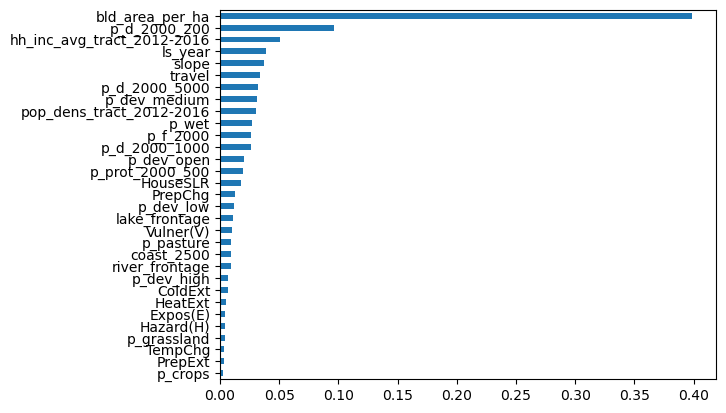

In [63]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh')

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


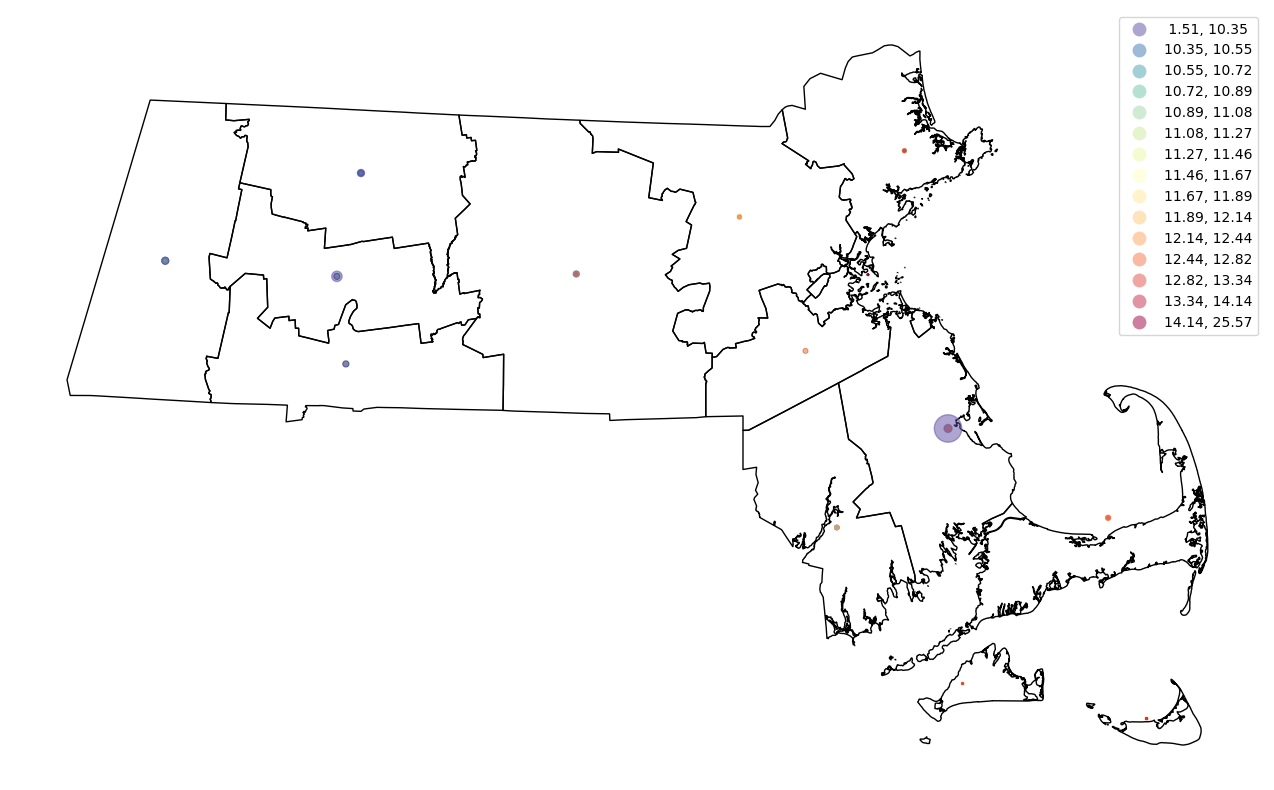

In [108]:
#random forest regressor
fig, ax = plt.subplots(figsize=(17, 10))
dp = merging_ma_gdf.join(model_ls_ols.fittedvalues.rename('pred'), how='inner')
maoutline.plot(ax=ax, color='none', edgecolor='black')

dp.plot(
    'pred',
    ax=ax,
    markersize='ms',
    alpha=0.50,
    cmap='Spectral_r',
    scheme='quantiles',
    k=15,
    legend=True
)
ax.axis('off')
filename = ('/Users/cecilywang/Downloads/EE508/Final_project/EstimatedLandValue_Map.png')
plt.savefig(filename, bbox_inches='tight', dpi=150)
plt.show()

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


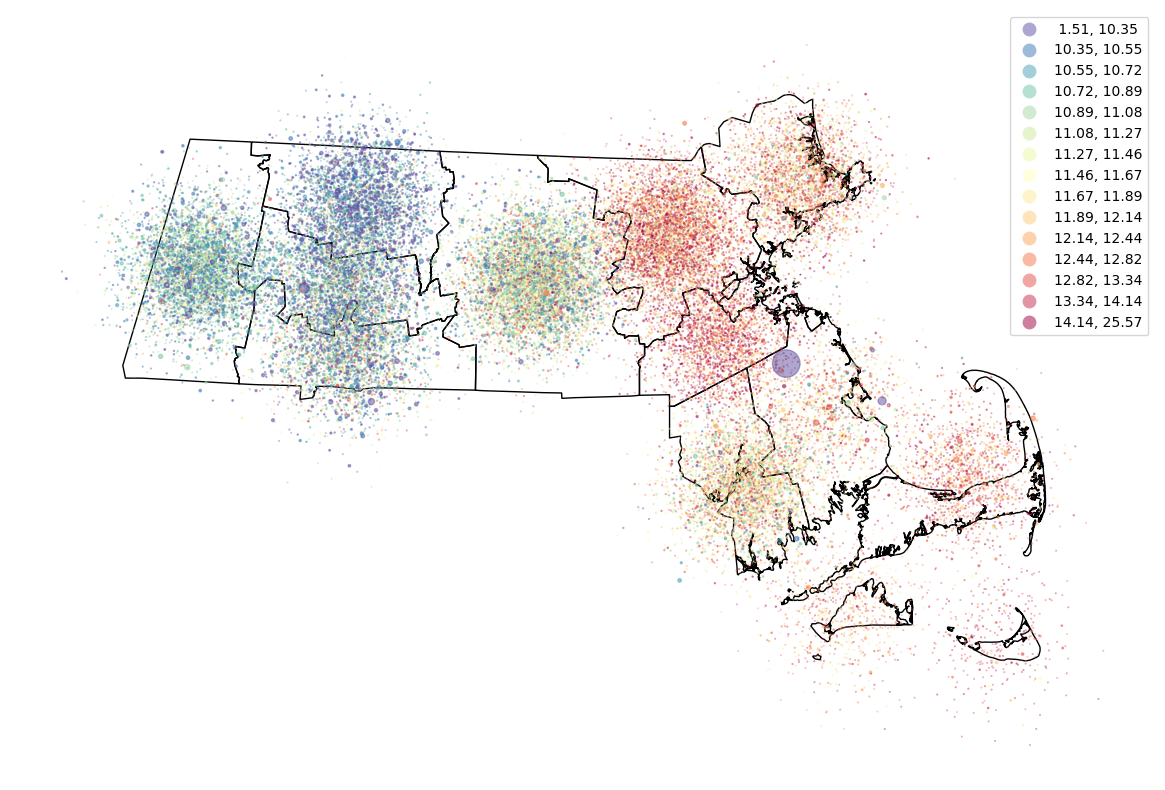

In [187]:
#random forest regressor
fig, ax = plt.subplots(figsize=(17, 10))
dp = merging_ma_gdf.join(model_ls_ols.fittedvalues.rename('pred'), how='inner')
maoutline.plot(ax=ax, color='none', edgecolor='black')

dp.plot(
    'pred',
    ax=ax,
    markersize='ms',
    alpha=0.50,
    cmap='Spectral_r',
    scheme='quantiles',
    k=15,
    legend=True
)
ax.axis('off')
filename = ('/Users/cecilywang/Downloads/EE508/Final_project/JitterEstimatedLandValue_Map.png')
plt.savefig(filename, bbox_inches='tight', dpi=150)
plt.show()

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


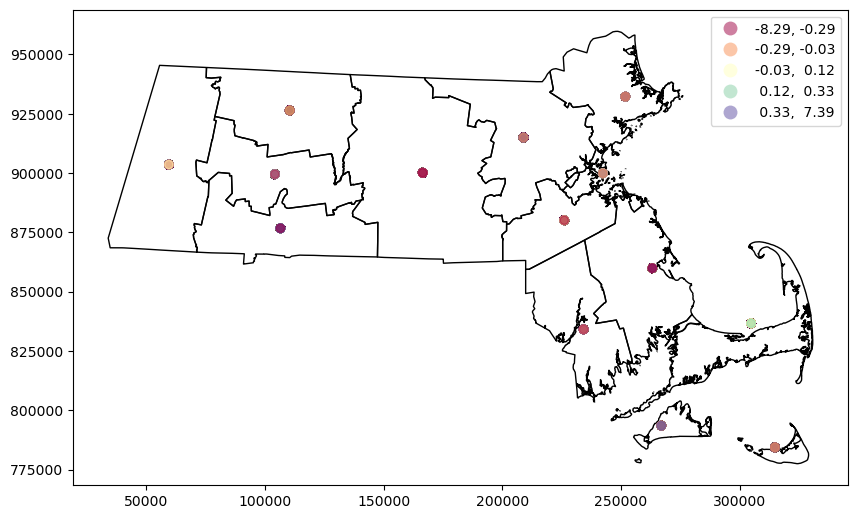

In [109]:
#our model = RandomforestRegressor of residuals 
fig, ax = plt.subplots(figsize=(10,10))
y_pred = pd.Series(model.predict(X), index=X.index) #model.predict returns array
resid = (y - y_pred).rename('resid')
shp_p = merging_ma_gdf.join(resid, how='inner')
maoutline.plot(ax=ax, color='none', edgecolor='black')

shp_p.plot(
    'resid',
    ax = ax,
    scheme='quantiles',
    legend=True,
    cmap='Spectral',
    alpha = .5,
    figsize=(17, 10)
)
filename = ('/Users/cecilywang/Downloads/EE508/Final_project/ResidualsLandValue_Map.png')
plt.savefig(filename, bbox_inches='tight', dpi=150)
plt.show()

# Perform Neural Network 

In [147]:


X = X_ls
y = y_ls

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)




(31096, 31)
(13328, 31)


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(8, 8, 8), activation='relu', solver='adam', max_iter=500)

# Fit the model
mlp_regressor.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp_regressor.predict(X_train)
y_test_pred = mlp_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)


Train Mean Squared Error: 23.304006477245633
Test Mean Squared Error: 21.46787612364326


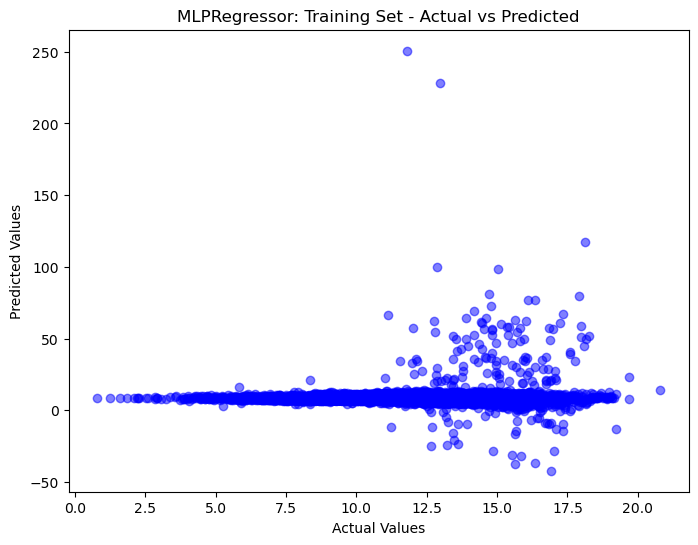

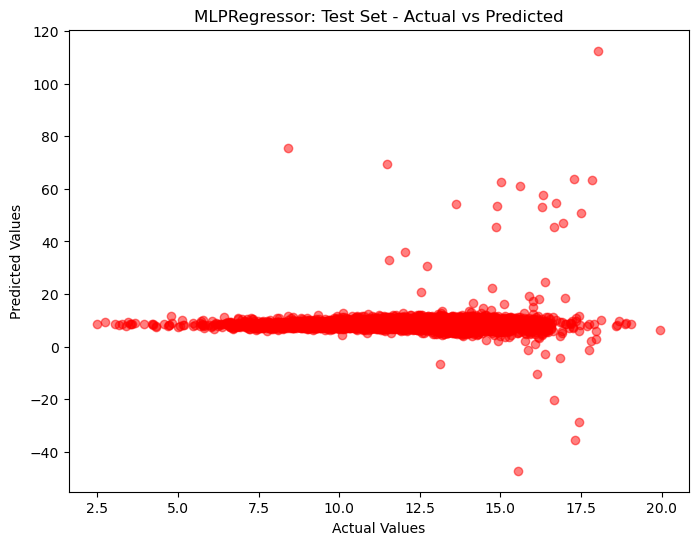

In [149]:

# Assuming you have already trained and predicted using MLPRegressor
y_train_pred = mlp_regressor.predict(X_train)
y_test_pred = mlp_regressor.predict(X_test)

# Scatter plot for training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.title('MLPRegressor: Training Set - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Scatter plot for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5)
plt.title('MLPRegressor: Test Set - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [150]:
!pip install seaborn


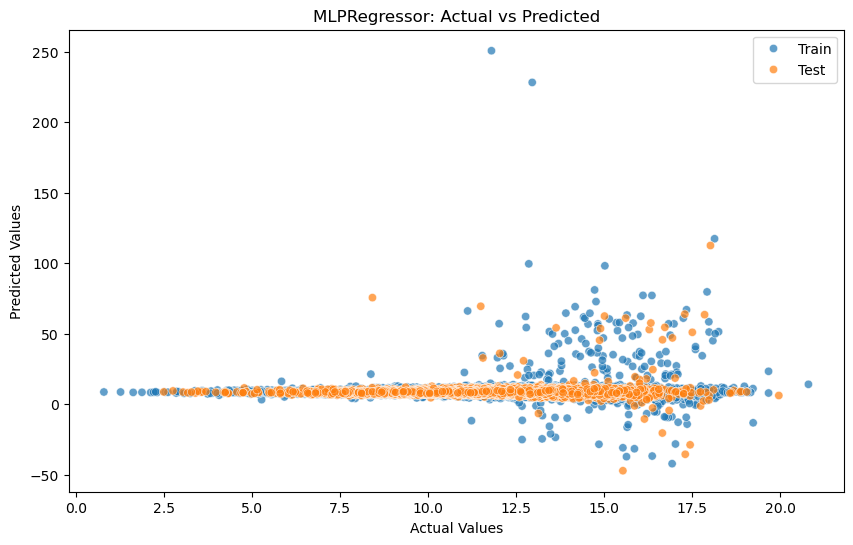

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained and predicted using MLPRegressor
y_train_pred = mlp_regressor.predict(X_train)
y_test_pred = mlp_regressor.predict(X_test)

# Create a DataFrame for visualization
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred, 'Set': 'Train'})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Set': 'Test'})
results = pd.concat([train_results, test_results])

# Create a scatter plot with regression line using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', hue='Set', data=results, alpha=0.7)
plt.title('MLPRegressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()


filename = ('/Users/cecilywang/Downloads/EE508/Final_project/MLPRegressor_ActualvsPredicted.png')
plt.savefig(filename, bbox_inches='tight', dpi=150)
plt.show()

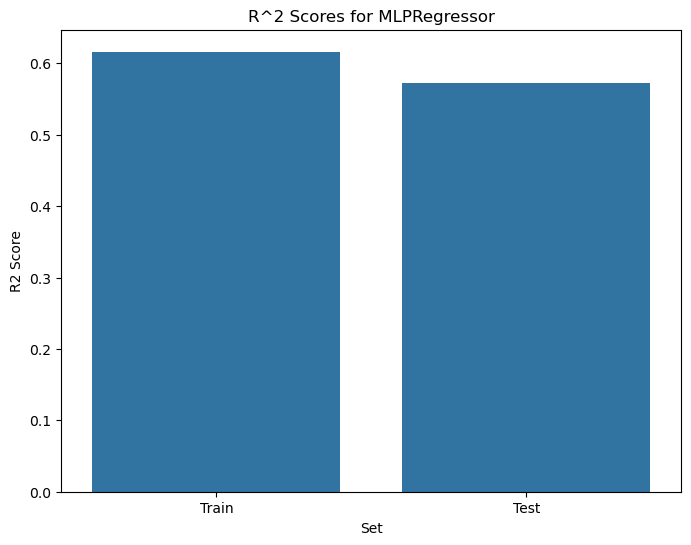

R2 Score    Set
0  0.616275  Train
1  0.572705   Test

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Calculate R^2 for training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Create a DataFrame for visualization
r2_results = pd.DataFrame({
    'R2 Score': [r2_train, r2_test],
    'Set': ['Train', 'Test']
})

# Plot R^2 Score
plt.figure(figsize=(8, 6))
sns.barplot(x='Set', y='R2 Score', data=r2_results)
plt.title('R^2 Scores for MLPRegressor')
plt.show()
r2_results

# Tuning an MLP Regressor using randomized search


In [154]:
from sklearn.preprocessing import StandardScaler

# Create a scaler and fit it on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to the test data
X_test_scaled = scaler.transform(X_test)


In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Define a parameter grid to search
parameter_space = {
    'hidden_layer_sizes': [(8,8), (8,8,8),(25,25),(25,25,25), (50,50,50), (50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Create MLPRegressor with base configuration
mlp = MLPRegressor(max_iter=75)

# Create GridSearchCV with the MLPRegressor and parameter grid
clf = RandomizedSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
clf.fit(X_train_scaled, y_train)

# Print the best parameters found and corresponding MSE
print('Best parameters found:\n', clf.best_params_)
print('Best MSE from random search:', -clf.best_score_)

# Use the best estimator for further predictions
y_train_pred = clf.best_estimator_.predict(X_train_scaled)
y_test_pred = clf.best_estimator_.predict(X_test_scaled)

# Evaluate the best model on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error for the tuned model:", test_mse)


/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't conv

Best parameters found:
 {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50), 'alpha': 0.0001, 'activation': 'tanh'}
Best MSE from random search: 1.5164442953604933
Test Mean Squared Error for the tuned model: 1.5111221382483384


/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


To use Principal Component Analysis (PCA) with the MLPRegressor in the script from main.py, you can follow these steps:

Import PCA: Import the PCA class from sklearn.decomposition.
Instantiate PCA: Instantiate a PCA object, deciding on the number of components you want to keep after the transformation.
Fit PCA: Fit PCA to the training data to identify principal components.
Transform Features: Use PCA to transform both the training and test datasets to the new principal component space.
Train MLPRegressor: Train the MLPRegressor on the PCA-transformed training data.
Evaluate the Model: Evaluate the performance of the MLPRegressor on the PCA-transformed test data.

In [156]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Load data
# Ensure X and y are assigned with appropriate values
# X, y = load_your_data()

# Standardize the features first
scaler = StandardScaler()

# Fit to data and then transform it
X_scaled = scaler.fit_transform(X)

# Initialize PCA, choose the number of components e.g., 95% variance
pca = PCA(n_components=0.95)

# Fit PCA on training data
X_reduced = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
# Use the PCA-reduced data for splitting
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Initialize MLPRegressor with desired hyperparameters
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50,50), activation='tanh', 
                             solver='adam', max_iter=500)

# Create a pipeline that standardizes, then runs PCA, then fits the MLP
pipeline = make_pipeline(StandardScaler(), PCA(n_components=0.95), mlp_regressor)

# Train the MLPRegressor on the training set using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluate the model performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train Mean Squared Error after PCA:", train_mse)
print("Test Mean Squared Error after PCA:", test_mse)

# Proceed with any further model evaluation and validation as needed


/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Mean Squared Error after PCA: 1.1262333903886361
Test Mean Squared Error after PCA: 1.62600455773362


After fitting PCA to your data using pca.fit(X_scaled), the PCA model calculates the principal components, which are accessible via pca.components_. Each principal component is a vector that points in a direction of maximal variance in the high-dimensional space.

You can also examine the amount of variance explained by each principal component using pca.explained_variance_ratio_. This gives you a sense of how much information is captured by each component.

To inspect the principal components and their explained variance ratios, you can use the following code after fitting pca:

Principal Components:
[[-1.80439788e-01 -2.22775612e-01  4.28989791e-02  4.18325234e-02
   7.14612040e-03  1.25913639e-02  2.64860922e-01  8.38992717e-02
  -2.47470306e-01 -1.41249914e-02  3.23526165e-01  3.35761210e-01
   3.40057816e-01  7.09203419e-02  1.85599615e-01  2.72214708e-01
   2.37525074e-01 -1.16818349e-02 -4.50421930e-02  5.69799191e-03
   2.26933201e-01  1.17768133e-04  1.87726225e-01  7.17142314e-02
   4.72040009e-02  2.60983671e-01 -1.34361644e-01 -4.02609587e-02
   4.20829715e-02  2.83661527e-01  7.75314641e-02]
 [ 4.54920384e-02  1.53490883e-01 -1.72674534e-01  1.51032820e-01
   1.00478908e-02 -2.39063618e-02  9.78186115e-02 -3.21021164e-01
  -2.22491544e-01 -6.67200118e-02  2.34454846e-01  1.68912796e-01
   4.29685185e-02 -7.69442476e-03  6.38530231e-02  1.88767533e-01
   1.93039423e-01  4.17546642e-02  2.61460008e-02  9.29261383e-02
   1.64811620e-01  1.39271357e-02 -2.46110898e-01 -1.40302583e-01
  -1.88644861e-01 -2.73388812e-01  3.58444013e-01  2.58541222e-01
   

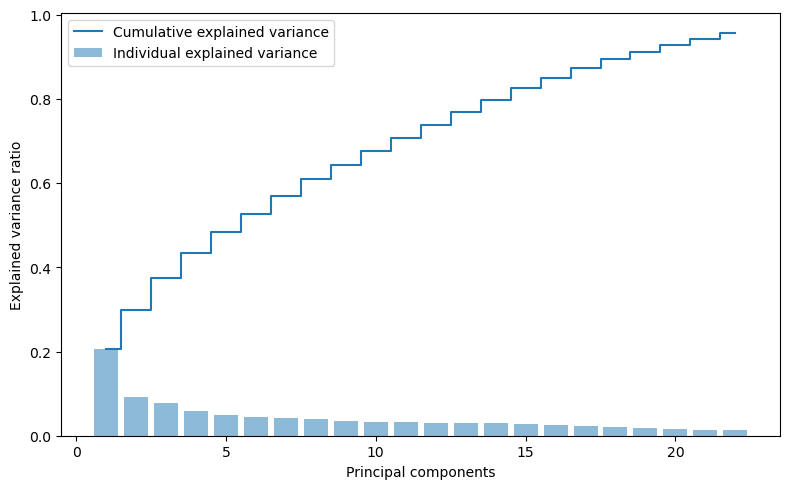

In [157]:
# Assuming `pca` has already been fitted to the standardized data `X_scaled`.

# Access the principal components
principal_components = pca.components_

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print principal components
print("Principal Components:")
print(principal_components)

# Print explained variance ratios
print("\nExplained Variance Ratios:")
print(explained_variance_ratio)

# Optionally, you can print the cumulative variance explained by the components
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("\nCumulative Explained Variance Ratios:")
print(cumulative_variance_ratio)

# To visualize the explained variance by each component
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

filename = '/Users/cecilywang/Downloads/EE508/Final_project/Graph_PCAcomponents.png'
plt.savefig(filename, bbox_inches='tight', dpi=150)
plt.show()

When combining PCA with an MLPRegressor for feature engineering and neural network research, visualizing the results can provide insights into both the dimensionality reduction and the performance of the neural network. Here are a few visualizations that might be useful:

Explained Variance Ratio Plot: Visualize the explained variance to show how much information (variance) is captured by each principal component:



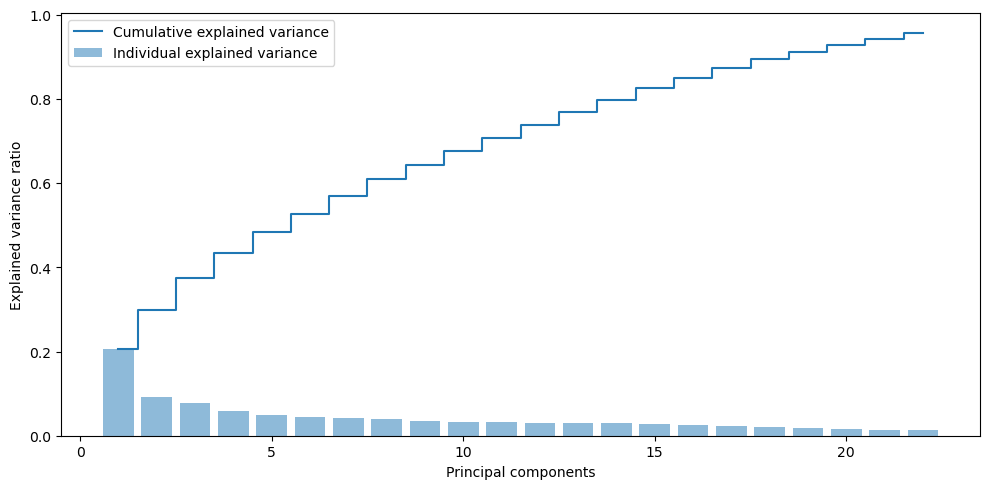

In [71]:
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(np.cumsum(pca.explained_variance_ratio_)) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


Scatter Plot of Principal Components: To visualize the data in the reduced feature space, you can plot the first two principal components against each other:

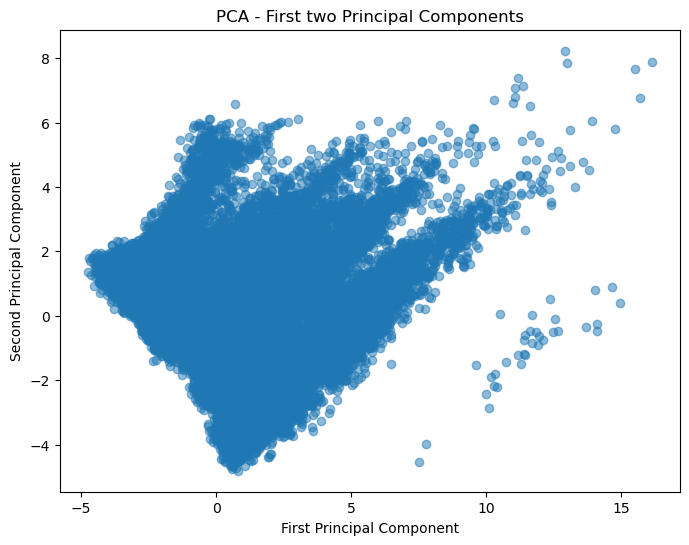

In [119]:
# Assuming PCA has already been performed with `n_components` set appropriately
pca_result = pca.transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First two Principal Components')
plt.show()


Neural Network's Prediction Scatter Plot: Compare actual versus predicted values after training the MLPRegressor to visualize the performance:

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Mean Squared Error: 1.3986532498548405
Test Mean Squared Error: 1.5381625501770482


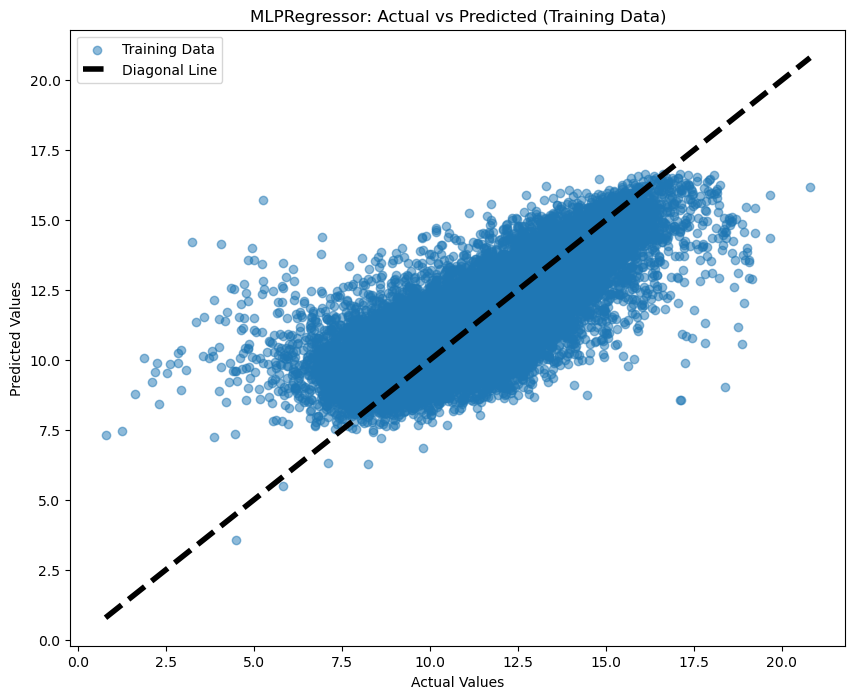

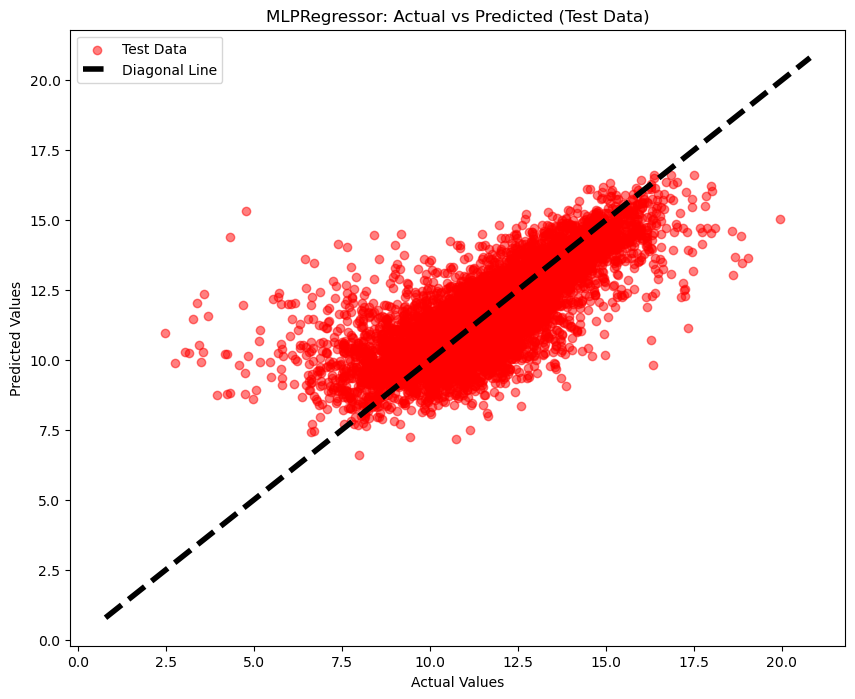

In [158]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_scaled)

# Split the data into train and test sets using the reduced feature set
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Initialize MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50,50), activation='tanh', 
                             solver='adam', max_iter=75, random_state=42)

# Train the MLPRegressor on the PCA-transformed training data
mlp_regressor.fit(X_train_pca, y_train)

# Predict on the PCA-transformed training and test data
y_train_pred = mlp_regressor.predict(X_train_pca)
y_test_pred = mlp_regressor.predict(X_test_pca)

# Calculate Mean Squared Error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)

# Plot the fit on the training data
plt.figure(figsize=(10, 8))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Training Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, label='Diagonal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('MLPRegressor: Actual vs Predicted (Training Data)')
plt.legend()

# Plot the fit on the testing data
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5, label='Test Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, label='Diagonal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('MLPRegressor: Actual vs Predicted (Test Data)')
plt.legend()
plt.show()


In [ ]:
Learning Curve: Analyze the training process over iterations (if available) to check for overfitting or underfitting:

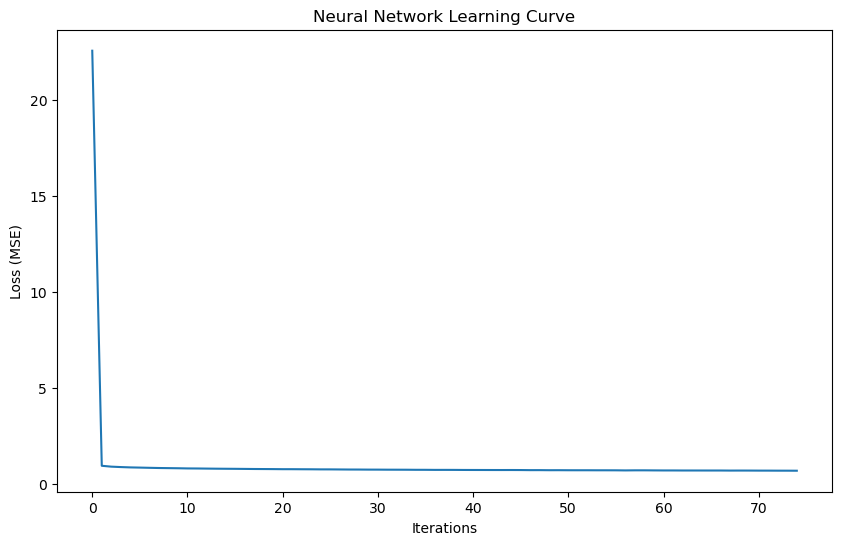

In [159]:
plt.figure(figsize=(10, 6))
plt.plot(mlp_regressor.loss_curve_)
plt.title('Neural Network Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')

filename = '/Users/cecilywang/Downloads/EE508/Final_project/mlp_losscurve.png'
plt.savefig(filename, bbox_inches='tight', dpi=150)
plt.show()

Feature Importance Plot from PCA: After training the regression model, visualize which features are considered the most important:



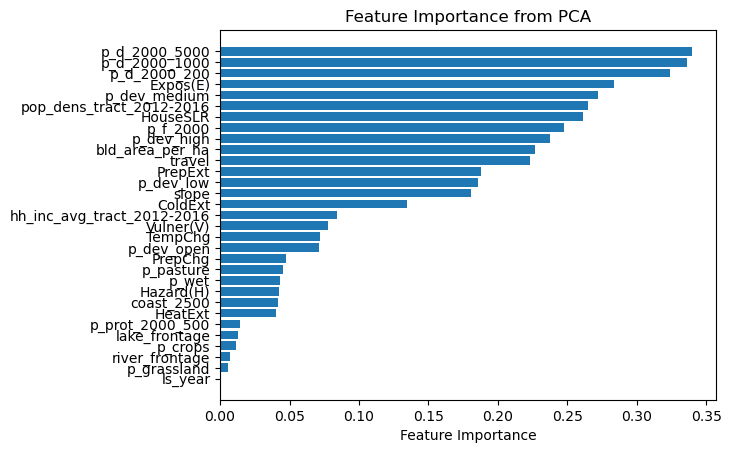

In [160]:
# A bar graph representation of the linear coefficients
feature_importance = np.abs(pca.components_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from PCA')

filename = '/Users/cecilywang/Downloads/EE508/Final_project/FeatureImportance_PCA.png'
plt.savefig(filename, bbox_inches='tight', dpi=150)
plt.show()

Choropleth Maps for Land Value Predictions:
You can create choropleth maps that show the predicted land values or the residuals (differences between actual and predicted values) across the counties. This visualization can be extended to show the change in land value predictions when incorporating climate risk data into the model.

This code is performing a dimensionality reduction technique known as Principal Component Analysis (PCA) and then visualizing the first principal component on a choropleth map, which is a thematic map where areas are shaded in proportion to the measurement of the statistical variable being displayed (in this case, the first principal component).

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


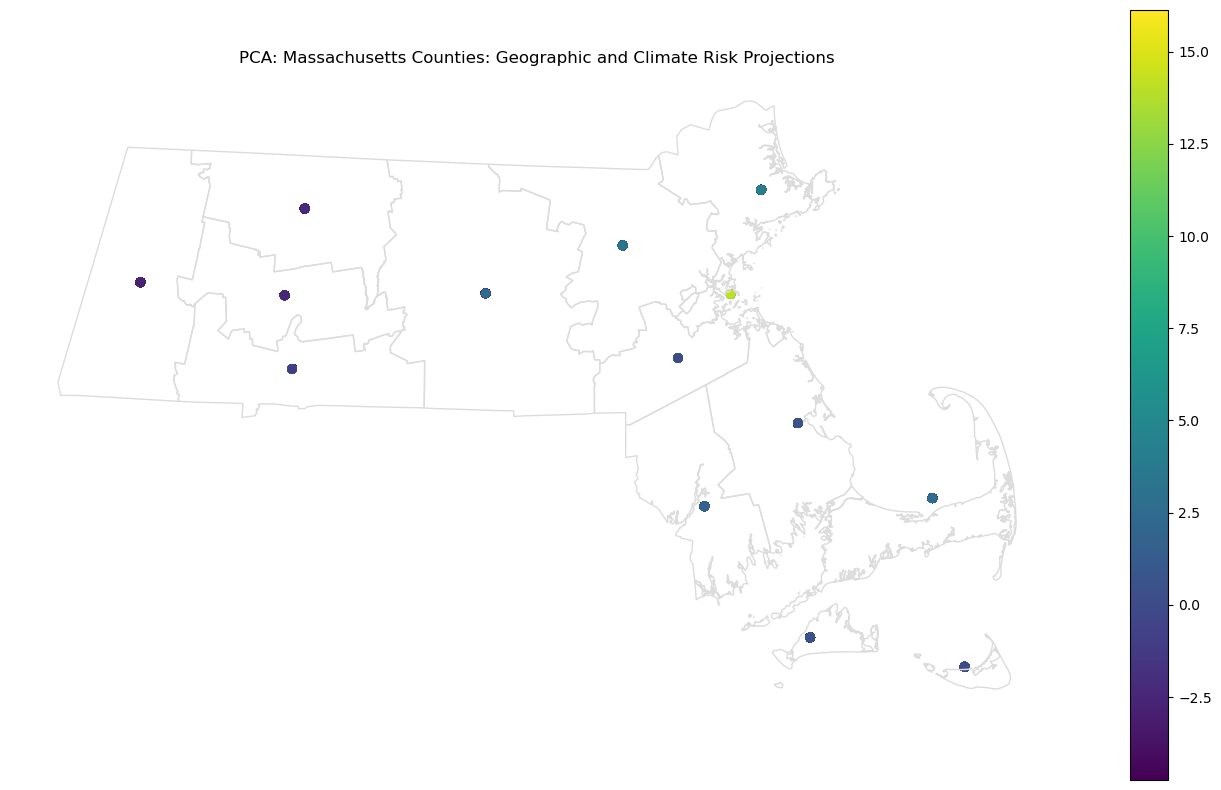

In [189]:

# Assuming X contains the features you want to use for PCA


# Standardize the features first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA, we will keep only the first principal component for the choropleth
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Create a GeoDataFrame with the PCA result
pca_df = pd.DataFrame(X_pca, columns=['PCA_1'], index=X_ls.index)

# Merge the PCA result with the geographic data, using the index
geo_pca_df = X_ls.merge(pca_df, left_index=True, right_index=True)

# Plot the choropleth map using the first principal component
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
geo_pca_df.plot(column='PCA_1', ax=ax, legend=True)

# Assuming maoutline is the GeoDataFrame with Massachusetts outline/borders
maoutline.plot(ax=ax, color='none', edgecolor='gainsboro')

# Remove axis off
ax.set_axis_off()
ax.set_title("PCA: Massachusetts Counties: Geographic and Climate Risk Projections")



filename = ('/Users/cecilywang/Downloads/EE508/Final_project/PCA_Map.png')
plt.savefig(filename, bbox_inches='tight', dpi=150)
plt.show()

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


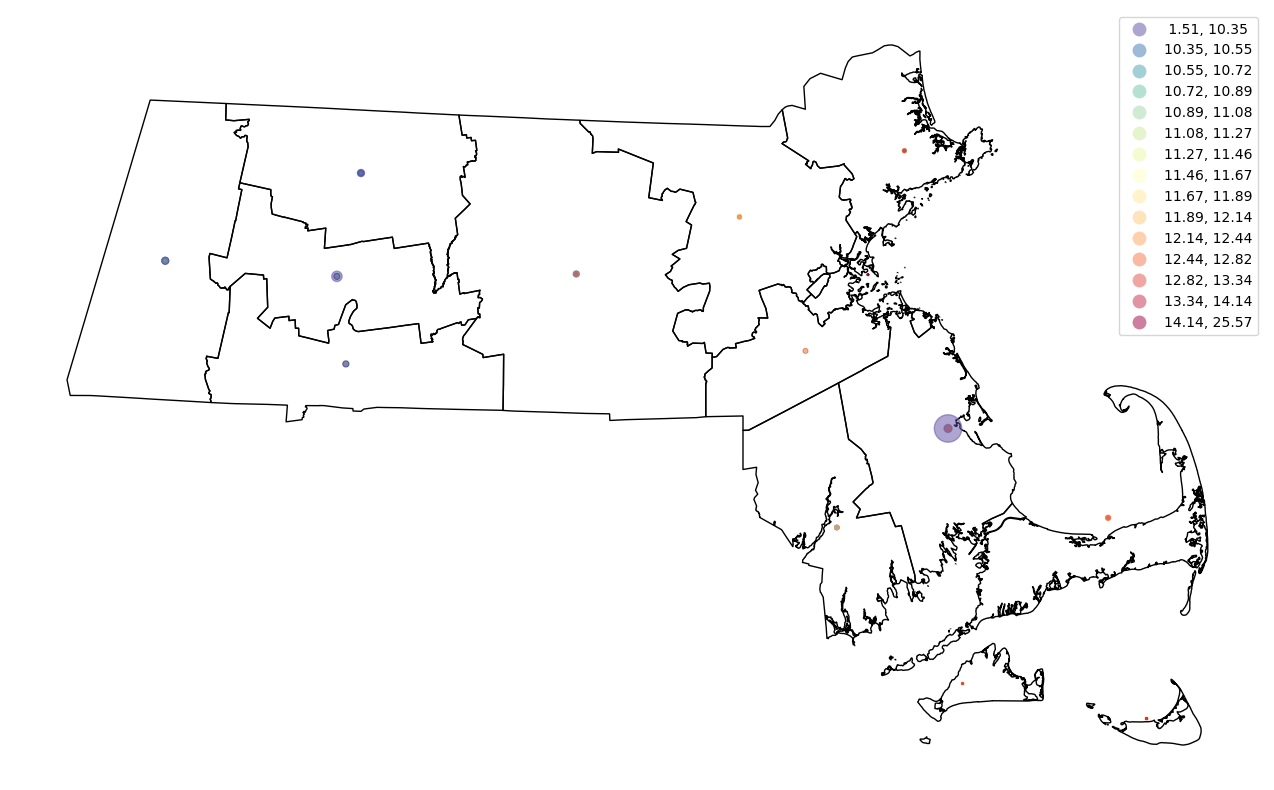

In [162]:
fig, ax = plt.subplots(figsize=(17, 10))
dp = merging_ma_gdf.join(model_ls_ols.fittedvalues.rename('pred'), how='inner')
maoutline.plot(ax=ax, color='none', edgecolor='black')

dp.plot(
    'pred',
    ax=ax,
    markersize='ms',
    alpha=0.50,
    cmap='Spectral_r',
    scheme='quantiles',
    k=15,
    legend=True
)
ax.axis('off')
filename = ('/Users/cecilywang/Downloads/EE508/Final_project/EstimatedLandValue_Map.png')
plt.savefig(filename, bbox_inches='tight', dpi=150)
plt.show()

/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


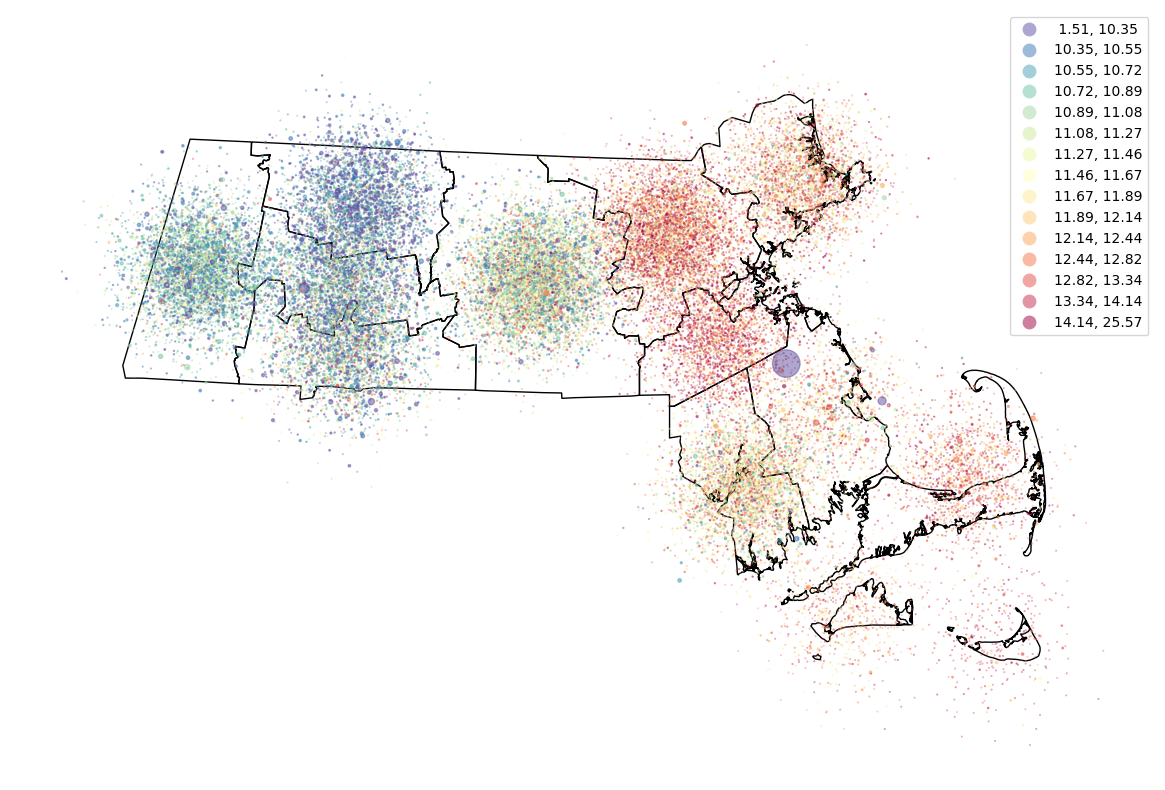

In [194]:
# ...

# Jitter the points
std_dev = 10  # Standard deviation of the jitter. This value may need to be adjusted.
dp['geometry'] = dp.apply(lambda row: row.geometry.buffer(np.random.normal(0, std_dev)), axis=1)

fig, ax = plt.subplots(figsize=(17, 10))
maoutline.plot(ax=ax, color='none', edgecolor='black')

dp.plot(
    'pred',
    ax=ax,
    markersize='ms',
    alpha=0.50,
    cmap='Spectral_r',
    scheme='quantiles',
    k=15,
    legend=True
)
ax.axis('off')
#filename = ('/Users/cecilywang/Downloads/EE508/Final_project/EstimatedLandValue_Map.png')
#plt.savefig(filename, bbox_inches='tight', dpi=150)
plt.show()

# ...


In [203]:
from shapely.geometry import Point

# Function to jitter points
def jitter_points(geometry, std_dev=.005):
    jittered_points = []
    for point in geometry:
        if isinstance(point, Point):
            # Adding random noise to the point's coordinates
            new_point = Point(
                point.x + np.random.normal(0, std_dev),
                point.y + np.random.normal(0, std_dev)
            )
            jittered_points.append(new_point)
        else:
            jittered_points.append(point)
    return jittered_points

# Apply jittering to the centroids
geometry_jittered = jitter_points(merging_ma_gdf.geometry, std_dev=.005)  # std_dev can be adjusted as needed
merging_ma_gdf['geometry_jittered'] = geometry_jittered



/Users/cecilywang/miniconda3/envs/ee508/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


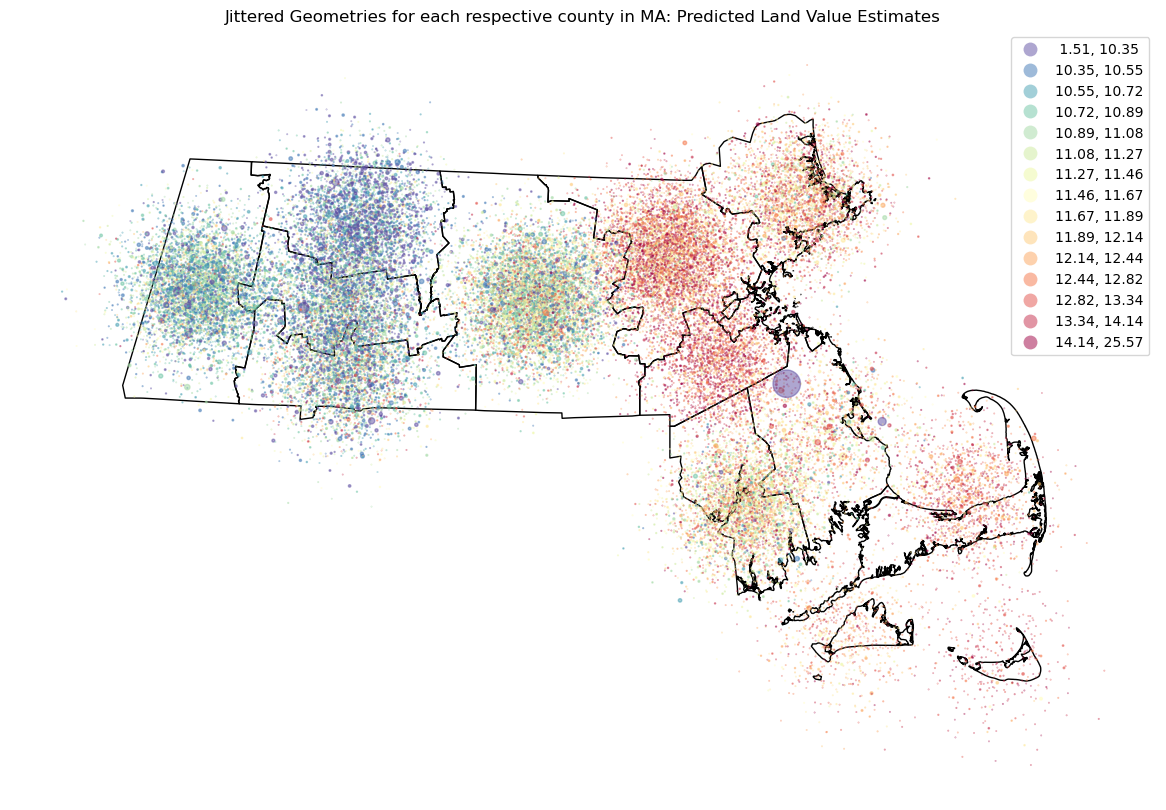

In [204]:
# Assume 'geometry_jittered' column is the new set of geometries to be plotted.
# Set the active geometry to 'geometry_jittered'
merging_ma_gdf.set_geometry('geometry_jittered', inplace=True)

# Now, plot the GeoDataFrame with the new active geometry
fig, ax = plt.subplots(figsize=(17, 10))
maoutline.plot(ax=ax, color='none', edgecolor='black')

# Assuming 'pred' is a column in your dataframe containing the values to be visualized
dp = merging_ma_gdf.join(model_ls_ols.fittedvalues.rename('pred'), how='inner')

dp.plot(
    'pred',
    ax=ax,
    markersize=dp['ms'],  # Ensure 'ms' is a column in `dp` for marker size
    alpha=0.50,
    cmap='Spectral_r',
    scheme='quantiles',
    k=15,
    legend=True,
    # geometry parameter removed here
)

ax.axis('off')
ax.set_title("Jittered Geometries for each respective county in MA: Predicted Land Value Estimates")

plt.show()



In [208]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming y_train, y_train_pred, y_test, and y_test_pred are defined from MLPRegressor as shown in your code
# And model.predict(X_train) and model.predict(X_test) are the predictions from RandomForestRegressor

# Compute R^2 values
r2_mlp_train = r2_score(y_pred,y_train_pred)
r2_mlp_test = r2_score(y_test_pred)
r2_rf_train = r2_score(model.predict(X_train_pca))
r2_rf_test = r2_score(model.predict(X_test_pca))

# Data for plotting
models = ['MLP Train', 'MLP Test', 'RF Train', 'RF Test']
r2_values = [r2_mlp_train, r2_mlp_test, r2_rf_train, r2_rf_test]

# Create a bar graph for R^2 values
fig, ax = plt.subplots()
ax.bar(models, r2_values, color=['blue', 'blue', 'green', 'green'])
ax.set_ylabel('R^2 Score')
ax.set_title('R^2 Scores by model and dataset')

# Display the graph
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [44424, 35539]